In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from keras.layers import *
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import *
import shutil

## CNN Model

In [2]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(32,(3,3),activation = "relu" , input_shape = (150,150,3)))
    model.add(Conv2D(56,(3,3), activation = "relu" ))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(72,(3,3),activation = "relu"))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(128,(3,3),activation = "relu"))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(64,activation = "relu"))
    model.add(Dense(4,activation = "softmax"))
    model.summary()
    return model

In [3]:
create_model()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 56)      16184     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 56)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 72)        36360     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 72)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)       83072     
_________________________________________________________________
max_

In [4]:
def drawimage(image,title="animal"):
    plt.imshow(image)
    plt.axis("off")
    plt.title(title,fontsize=20)
    plt.show()

## Data Preparation

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

In [6]:
pth = Path("images/")
for file in pth.glob("*"):
    cnt=0
    for img in file.glob("*.jpg"):
        cnt+=1
    print(str(file).split("/")[-1])
    print(cnt)

cats
202
humans
202
horses
202
dogs
202


In [36]:
#dictionardi
digit2label ={0:"cats",1:"dogs",2:"horses",3:"humans"}

### how to create the val file 

In [35]:
os.listdir("images")

['cats', 'humans', 'horses', 'dogs']

In [37]:

if not  os.path.isdir("val_img"):
    os.mkdir("./val_img")

In [38]:
print(os.listdir("val_img"))
for i in digit2label.items():
    x,y=i
    print(x)
    print(y)

['human', 'cats', 'horses', 'dogs']
0
cats
1
dogs
2
horses
3
humans


In [40]:
for c in digit2label.items():
    label,l_name = c
    pth = os.path.join("val_img",l_name)
    print(pth)
    if not os.path.isdir(pth):
        print(pth)
        os.mkdir(pth)

val_img/cats
val_img/dogs
val_img/horses
val_img/humans


In [41]:
print(os.listdir("val_img"))

['cats', 'humans', 'horses', 'dogs']


In [48]:
split = 0.8
for f in os.listdir("images"):
    p = os.path.join("images/"+f)
    img = os.listdir(p)
    
    split_size = int(split*int(len(img)))
    file_2_mv = img[split_size:]
    print(len(file_2_mv))
    
    for imgfile in file_2_mv:
        src = "images/"+f+"/"+imgfile
        des = "val_img/"+f+"/"+imgfile
        
        print(src)
        print(des)
        
        shutil.move(src,des)

33
images/cats/cat.14.jpg
val_img/cats/cat.14.jpg
images/cats/cat.25.jpg
val_img/cats/cat.25.jpg
images/cats/cat.7.jpg
val_img/cats/cat.7.jpg
images/cats/cat.58.jpg
val_img/cats/cat.58.jpg
images/cats/cat.189.jpg
val_img/cats/cat.189.jpg
images/cats/cat.169.jpg
val_img/cats/cat.169.jpg
images/cats/cat.140.jpg
val_img/cats/cat.140.jpg
images/cats/cat.28.jpg
val_img/cats/cat.28.jpg
images/cats/cat.30.jpg
val_img/cats/cat.30.jpg
images/cats/cat.117.jpg
val_img/cats/cat.117.jpg
images/cats/cat.51.jpg
val_img/cats/cat.51.jpg
images/cats/cat.39.jpg
val_img/cats/cat.39.jpg
images/cats/cat.72.jpg
val_img/cats/cat.72.jpg
images/cats/cat.184.jpg
val_img/cats/cat.184.jpg
images/cats/cat.139.jpg
val_img/cats/cat.139.jpg
images/cats/cat.187.jpg
val_img/cats/cat.187.jpg
images/cats/cat.193.jpg
val_img/cats/cat.193.jpg
images/cats/cat.56.jpg
val_img/cats/cat.56.jpg
images/cats/cat.6.jpg
val_img/cats/cat.6.jpg
images/cats/cat.52.jpg
val_img/cats/cat.52.jpg
images/cats/cat.178.jpg
val_img/cats/cat.178.

In [49]:
len(os.listdir("val_img/dogs/"))

33

### ImageGenerator

In [8]:
image_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [9]:
img_gen_dir = image_gen.flow_from_directory("images/",
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset = 'training'                                                              
            )

Found 648 images belonging to 4 classes.


In [10]:
label ,cnt_label = np.unique(img_gen_dir.labels,return_counts = True)
print(label,cnt_label)

[0 1 2 3] [162 162 162 162]


************************************************************
(32, 150, 150, 3)
(32, 4)
0


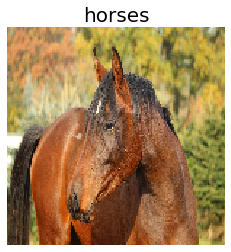

************************************************************
(32, 150, 150, 3)
(32, 4)
32


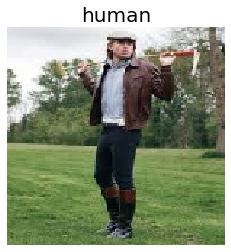

************************************************************
(32, 150, 150, 3)
(32, 4)
64


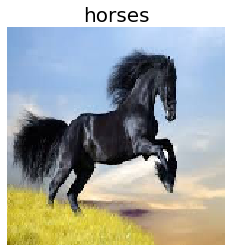

************************************************************
(32, 150, 150, 3)
(32, 4)
96


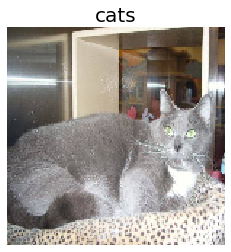

************************************************************
(32, 150, 150, 3)
(32, 4)
128


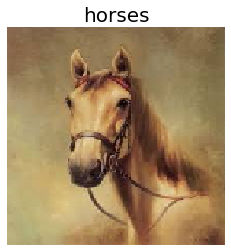

************************************************************
(32, 150, 150, 3)
(32, 4)
160


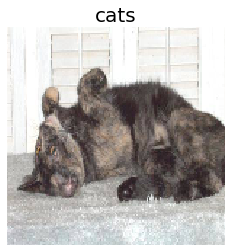

************************************************************
(32, 150, 150, 3)
(32, 4)
192


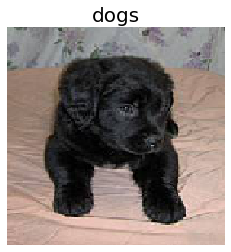

In [11]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  img_gen_dir:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    drawimage(x[1],digit2label[y[1].argmax()])

    cnt+=x.shape[0]
    if cnt > 200:
        break

In [12]:
validation_generator = image_gen.flow_from_directory(
        'images/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset = "validation"
)

Found 160 images belonging to 4 classes.


************************************************************
(32, 150, 150, 3)
(32, 4)
0


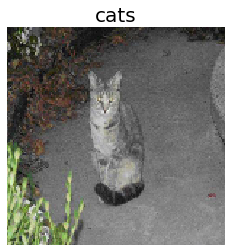

************************************************************
(32, 150, 150, 3)
(32, 4)
32


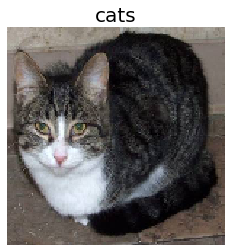

In [13]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  validation_generator:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    
    #image draw
    drawimage(x[1],digit2label[y[1].argmax()])
    cnt+=x.shape[0]
    if cnt > 50:
        break

In [14]:
print(img_gen_dir.samples)
print(validation_generator.samples)

648
160


## Training our Model

In [15]:
from keras.optimizers import adam
adam = adam(lr = 1e-04)

In [16]:
model = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 56)      16184     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 56)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 72)        36360     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 72)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 128)       83072     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
__________

In [17]:
class_model = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 146, 146, 56)      16184     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 56)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 72)        36360     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 72)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 128)       83072     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 128)       0         
__________

In [18]:
class_model.compile(optimizer=adam ,loss = "categorical_crossentropy",metrics=["accuracy"])

In [19]:
batchsize = 32
n_epoch = 20

In [20]:

hist = class_model.fit_generator(img_gen_dir
                                ,steps_per_epoch=img_gen_dir.samples//batchsize,
                                epochs=n_epoch,
                                 validation_data=validation_generator,
                                 validation_steps=validation_generator.samples//batchsize
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
20/20 [==============================] - 62s 3s/step - loss: 1.3810 - acc: 0.3048 - val_loss: 1.3734 - val_acc: 0.2625
Epoch 2/20
20/20 [==============================] - 60s 3s/step - loss: 1.3357 - acc: 0.3806 - val_loss: 1.3141 - val_acc: 0.4188
Epoch 3/20
20/20 [==============================] - 62s 3s/step - loss: 1.2409 - acc: 0.4935 - val_loss: 1.2437 - val_acc: 0.3625
Epoch 4/20
20/20 [==============================] - 66s 3s/step - loss: 1.1167 - acc: 0.5324 - val_loss: 1.1325 - val_acc: 0.5312
Epoch 5/20
20/20 [==============================] - 64s 3s/step - loss: 1.0173 - acc: 0.5843 - val_loss: 1.0008 - val_acc: 0.5687
Epoch 6/20
20/20 [==============================] - 66s 3s/step - loss: 0.9257 - acc: 0.6425 - val_loss: 0.9367 - val_acc: 0.5875
Epoch 7/20
20/20 [==============================] - 63s 3s/step - loss: 0.7808 - acc: 0.7041 - val_loss: 0.9312 - val_acc: 0.5813
Epoch 8/20
20/20 [========================

## Graph Plot

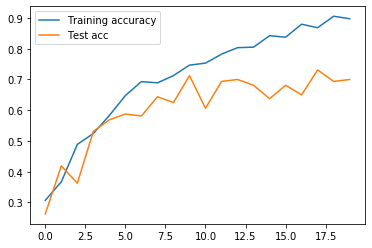

In [23]:
plt.plot(hist.history["acc"],label="Training accuracy")
plt.plot(hist.history["val_acc"],label="Test acc")
plt.legend()

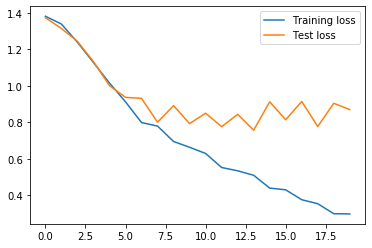

In [24]:
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Test loss")
plt.legend()

## Prediction

In [28]:
pred = class_model.predict(x)
pred[1]

array([4.5762557e-05, 5.0610092e-02, 7.1350265e-01, 2.3584151e-01],
      dtype=float32)

************************************************************
(32, 150, 150, 3)
(32, 4)
0


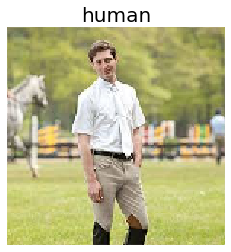

************************************************************
(32, 150, 150, 3)
(32, 4)
1


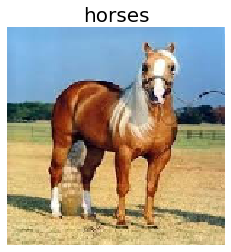

************************************************************
(32, 150, 150, 3)
(32, 4)
2


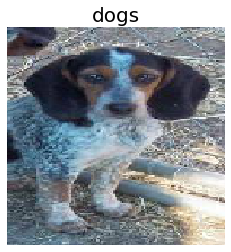

************************************************************
(32, 150, 150, 3)
(32, 4)
3


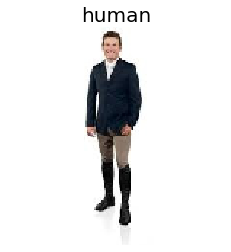

************************************************************
(32, 150, 150, 3)
(32, 4)
4


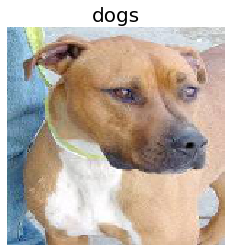

************************************************************
(32, 150, 150, 3)
(32, 4)
5


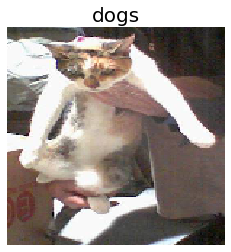

************************************************************
(32, 150, 150, 3)
(32, 4)
6


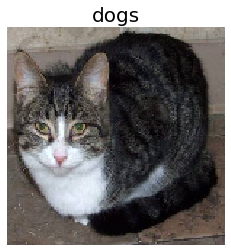

************************************************************
(32, 150, 150, 3)
(32, 4)
7


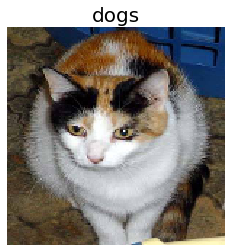

************************************************************
(32, 150, 150, 3)
(32, 4)
8


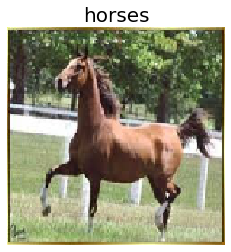

************************************************************
(32, 150, 150, 3)
(32, 4)
9


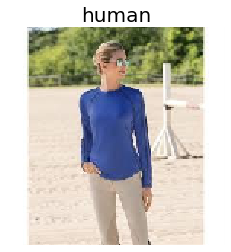

************************************************************
(32, 150, 150, 3)
(32, 4)
10


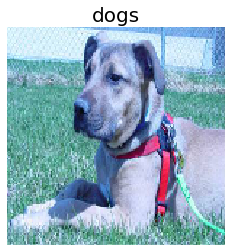

************************************************************
(32, 150, 150, 3)
(32, 4)
11


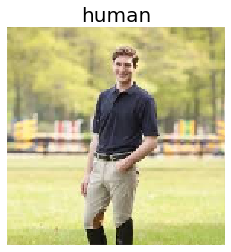

************************************************************
(32, 150, 150, 3)
(32, 4)
12


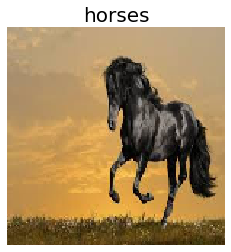

************************************************************
(32, 150, 150, 3)
(32, 4)
13


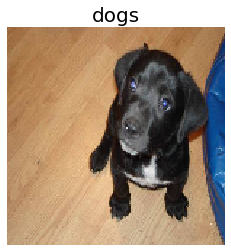

************************************************************
(32, 150, 150, 3)
(32, 4)
14


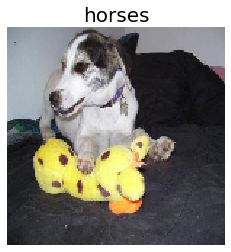

************************************************************
(32, 150, 150, 3)
(32, 4)
15


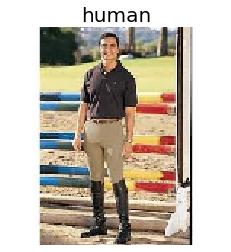

************************************************************
(32, 150, 150, 3)
(32, 4)
16


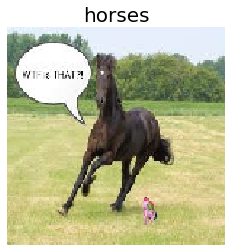

************************************************************
(32, 150, 150, 3)
(32, 4)
17


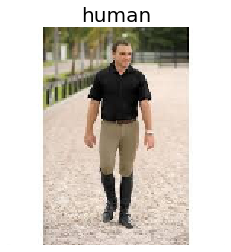

************************************************************
(32, 150, 150, 3)
(32, 4)
18


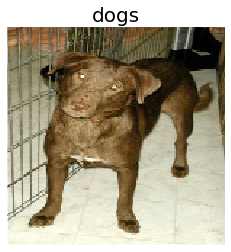

************************************************************
(32, 150, 150, 3)
(32, 4)
19


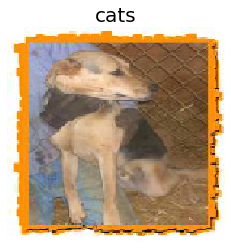

************************************************************
(32, 150, 150, 3)
(32, 4)
20


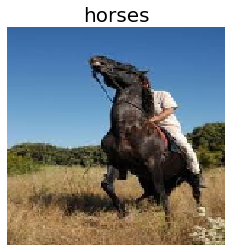

In [31]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  validation_generator:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    pred = class_model.predict(x)
    #image draw
    drawimage(x[1],digit2label[pred[1].argmax()])
    cnt+=1
    if cnt > 20:
        break